## Deteccion usando el modelo entregando


In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

/Users/humbertofariasaroca/anaconda3/envs/mask/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/humbertofariasaroca/anaconda3/envs/mask/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/humbertofariasaroca/anaconda3/envs/mask/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hum

In [2]:
# Ubicación de la libreria mask r-cnn
ROOT_DIR = os.path.abspath("../../../")

In [3]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [4]:
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config

Using TensorFlow backend.


In [5]:
import galaxia

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
%matplotlib inline 

### Notebook configuration

In [152]:
def get_ax(rows=1, cols=1, size=12):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

### Carpetas

In [9]:
ROOT_DIR

'/Users/humbertofariasaroca/lab/galaxy-morphological-classification'

In [10]:
# Carpeta para guardar registros y modelo entrenado
MODEL_DIR = os.path.join(ROOT_DIR, "redes/two_class_zoo1/modelos")
MODEL_DIR

'/Users/humbertofariasaroca/lab/galaxy-morphological-classification/redes/two_class_zoo1/modelos'

In [11]:
# ruta a los pesos de la red
WEIGHTS_PATH = os.path.join(MODEL_DIR,"galaxia_all_1.h5")
#WEIGHTS_PATH = "/home/ubuntu/lab/mask_r_cnn/Mask_RCNN/samples/dos/modelos/galaxia_all_1_dos_.h5"
WEIGHTS_PATH

'/Users/humbertofariasaroca/lab/galaxy-morphological-classification/redes/two_class_zoo1/modelos/galaxia_all_1.h5'

In [12]:
pwd

'/Users/humbertofariasaroca/lab/galaxy-morphological-classification/redes/two_class_zoo1/inspect_model'

## Imagen

In [13]:
import skimage.io
import matplotlib.pyplot  as plt
import cv2

In [14]:
def mean_pi (_img):
    myimg = cv2.imread(_img)
    avg_color_per_row = numpy.average(myimg, axis=0)
    avg_color = numpy.average(avg_color_per_row, axis=0)
    _r,_g,_b = avg_color[0],avg_color[1],avg_color[2]
    return(_r,_g,_b)

In [15]:
def get_image_sloan(_ra,_dec,_scale=0.560115,_width=100,_height=100):
    url = "http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra="+str(_ra)+"&dec="+str(_dec)+"&scale="+str(_scale)+"&width="+str(_width)+"&height="+str(_height)+""
    #url ="https://raw.githubusercontent.com/astroCV/astroCV/master/galaxy_detection/writable/downloaded.jpg"
    image=skimage.io.imread(url)
    print(url)
    return(image)

In [16]:
_ra = 18.837
_dec = 0.26

In [17]:
image = get_image_sloan(_ra,_dec)

http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra=18.837&dec=0.26&scale=0.560115&width=100&height=100


## Detection configuration

Configurations are defined in galaxia.py

In [18]:
config = galaxia.GalaxiaConfig()

In [285]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.5
    IMAGE_MIN_DIM = 2048
    IMAGE_MAX_DIM = 2048


config = InferenceConfig()
#config.display()

## Read Model

In [286]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",config=config,model_dir=MODEL_DIR)

In [287]:
# Read the weights of the trained network
print("Loading weights ", WEIGHTS_PATH)
model.load_weights(WEIGHTS_PATH, by_name=True)


Loading weights  /Users/humbertofariasaroca/lab/galaxy-morphological-classification/redes/two_class_zoo1/modelos/galaxia_all_1.h5


## Run Detector 

In [279]:
import skimage.io
import matplotlib.pyplot  as plt
import numpy

In [280]:
image=skimage.io.imread("../imagenes/astrocv.jpg")

In [266]:
def get_image_sloan(_ra,_dec,_scale=0.360115,_width=512,_height=512):
    url = "http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra="+str(_ra)+"&dec="+str(_dec)+"&scale="+str(_scale)+"&width="+str(_width)+"&height="+str(_height)+""
    image=skimage.io.imread(url)
    print(url)
    return(image)

In [127]:
_ra = 309.42896
_dec = -1.1696352#PLANO CON MUCHAS FUENTES

In [267]:
image = get_image_sloan(_ra,_dec)

http://skyserver.sdss.org/dr15/SkyServerWS/ImgCutout/getjpeg?ra=204.061083&dec=-1.040233&scale=0.360115&width=512&height=512


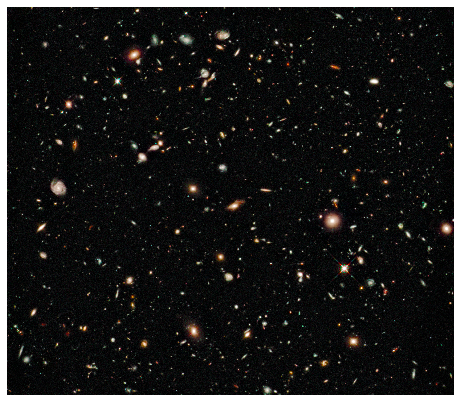

In [288]:
plt.figure(figsize = (8,8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [289]:
class_names = ['BG',"S","E"]

Processing 1 images
image                    shape: (2039, 2345, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 2048, 2048, 3)    min:  -19.04000  max:  244.29000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 2345.00000  float64
anchors                  shape: (1, 1047552, 4)       min:   -0.04422  max:    1.01295  float32


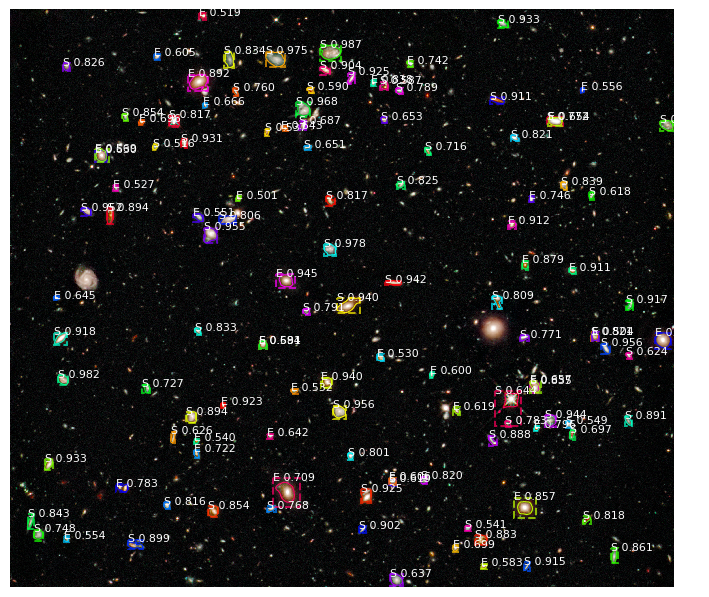

In [291]:
results = model.detect([image], verbose=1)

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], show_mask=False, ax=get_ax())

In [292]:
len(r['scores'])

119